<a href="https://www.kaggle.com/code/sitbayevalibek/central-asia-earthquake-prediction-portfolio?scriptVersionId=131443646" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/central-asian-earthquake-dataset/Central-Asian-earthquake-dataset.csv


# Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/kaggle/input/central-asian-earthquake-dataset/Central-Asian-earthquake-dataset.csv')
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Country
0,2023-05-28,00:24:55,36.80,71.31,100.0,4.6,Afghanistan
1,2023-05-26,13:08:12,40.32,74.01,20.0,4.2,Kyrgyzstan
2,2023-05-26,07:34:47,37.87,73.52,179.0,4.3,Tajikistan
3,2023-05-25,16:00:16,37.04,71.11,229.0,4.0,Afghanistan
4,2023-05-25,04:30:49,36.43,71.13,100.0,4.1,Afghanistan


In [4]:
df.shape

(5290, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5290 non-null   object 
 1   Time       5290 non-null   object 
 2   Latitude   5290 non-null   float64
 3   Longitude  5290 non-null   float64
 4   Depth      5290 non-null   float64
 5   Magnitude  5290 non-null   float64
 6   Country    5290 non-null   object 
dtypes: float64(4), object(3)
memory usage: 289.4+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5290 non-null   datetime64[ns]
 1   Time       5290 non-null   object        
 2   Latitude   5290 non-null   float64       
 3   Longitude  5290 non-null   float64       
 4   Depth      5290 non-null   float64       
 5   Magnitude  5290 non-null   float64       
 6   Country    5290 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 289.4+ KB


# Visualization

In [8]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_20/782438531.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,Latitude,Longitude,Depth,Magnitude
Latitude,1.000000,0.261684,0.426123,0.364331
Longitude,0.261684,1.000000,0.184091,0.374080
Depth,0.426123,0.184091,1.000000,0.470875
Magnitude,0.364331,0.374080,0.470875,1.000000


In [9]:
df.corrwith(df['Magnitude']).abs().sort_values(ascending=False)

/tmp/ipykernel_20/2444353272.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Magnitude']).abs().sort_values(ascending=False)


Magnitude    1.000000
Depth        0.470875
Longitude    0.374080
Latitude     0.364331
dtype: float64

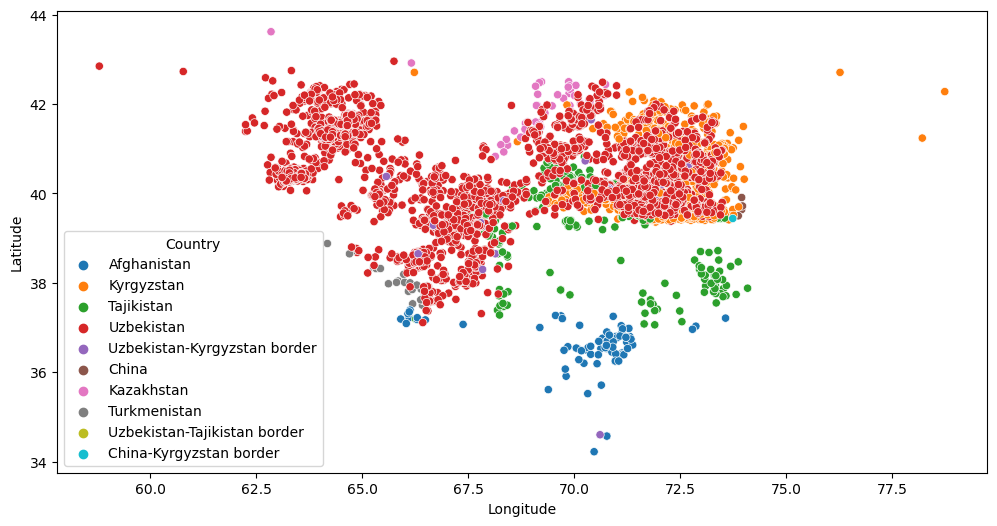

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Country')
plt.show()

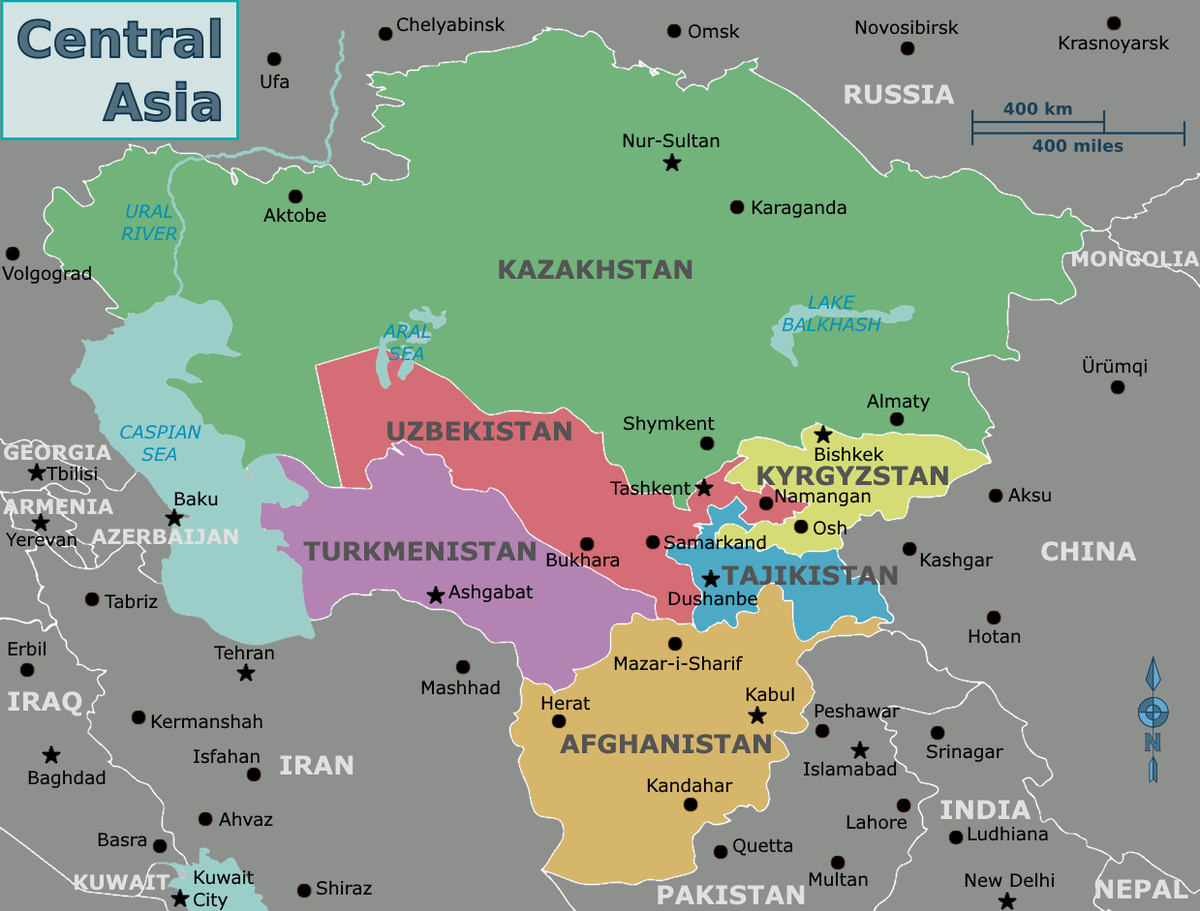

In [11]:
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)

In [12]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
mag = train_set.drop('Magnitude', axis=1)
mag_y = train_set['Magnitude'].copy()

In [14]:
mag_num = mag.drop('Country', axis=1)
mag_cat = mag[['Country']]

In [15]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [16]:
num_pipeline.fit_transform(mag_num)

array([[ 0.23660914,  1.07080302, -0.21950613],
       [-0.8775757 ,  1.0937174 , -0.42061063],
       [-0.6657885 ,  0.99346701,  0.50447007],
       ...,
       [ 0.28264984,  1.18537489,  0.06204017],
       [-1.73393264, -0.58476055,  0.02181927],
       [-1.86284659, -0.60194633, -0.29994793]])

In [17]:
num_attr = list(mag_num)
cat_attr = ['Country']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attr),
    ('cat', OneHotEncoder(), cat_attr)
])

In [18]:
mag_prepared = full_pipeline.fit_transform(mag)

# Modelling

In [19]:
RF_model = RandomForestRegressor()
RF_model.fit(mag_prepared, mag_y)

RandomForestRegressor()

In [20]:
test_data = mag.sample(20)
test_data

,Latitude,Longitude,Depth,Country
3704,38.40,66.52,4.0,Uzbekistan
3694,39.93,68.43,18.0,Uzbekistan
2101,41.66,64.25,5.0,Uzbekistan
866,42.20,63.75,5.0,Uzbekistan
4329,41.85,70.29,10.0,Uzbekistan
1320,41.52,64.57,5.0,Uzbekistan
4772,39.98,65.40,11.0,Uzbekistan
464,42.02,64.16,8.0,Uzbekistan
2088,41.66,64.27,20.0,Uzbekistan
2894,40.47,63.49,5.0,Uzbekistan


In [21]:
test_label = mag_y.loc[test_data.index]
test_label

3704    2.0
3694    2.6
2101    1.7
866     1.6
4329    2.5
1320    2.2
4772    2.6
464     1.8
2088    1.7
2894    2.2
5187    2.6
2112    2.5
4235    3.5
4528    2.0
3701    2.1
3962    2.0
4236    2.6
3401    2.0
3738    2.9
3527    2.3
Name: Magnitude, dtype: float64

In [22]:
#tdp = test_data_prepared (abbreviation)
tdp = full_pipeline.transform(test_data)

In [23]:
predicted_data = RF_model.predict(tdp)

In [24]:
pd.DataFrame({'Predicted Magnitude':(predicted_data).round(2), 'Real Magnitude': test_label})

,Predicted Magnitude,Real Magnitude
3704,2.13,2.0
3694,2.61,2.6
2101,1.80,1.7
866,1.66,1.6
4329,2.34,2.5
1320,2.25,2.2
4772,2.44,2.6
464,1.80,1.8
2088,1.80,1.7
2894,2.18,2.2


In [25]:
mag_test = test_set.drop('Magnitude', axis=1)
mag_y_test = test_set['Magnitude'].copy()

In [26]:
#mag_test_pre = mag test prepared (abbreviation)
mag_test_pre = full_pipeline.transform(mag_test)

In [27]:
mag_y_predicted = RF_model.predict(mag_test_pre)

In [28]:
lin_mse = mean_squared_error(mag_y_test, mag_y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(f"{lin_rmse:.3f}")

0.459
